<ipython-input-2-0f86263c370f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_activity.index, y=monthly_activity.values, palette='viridis')


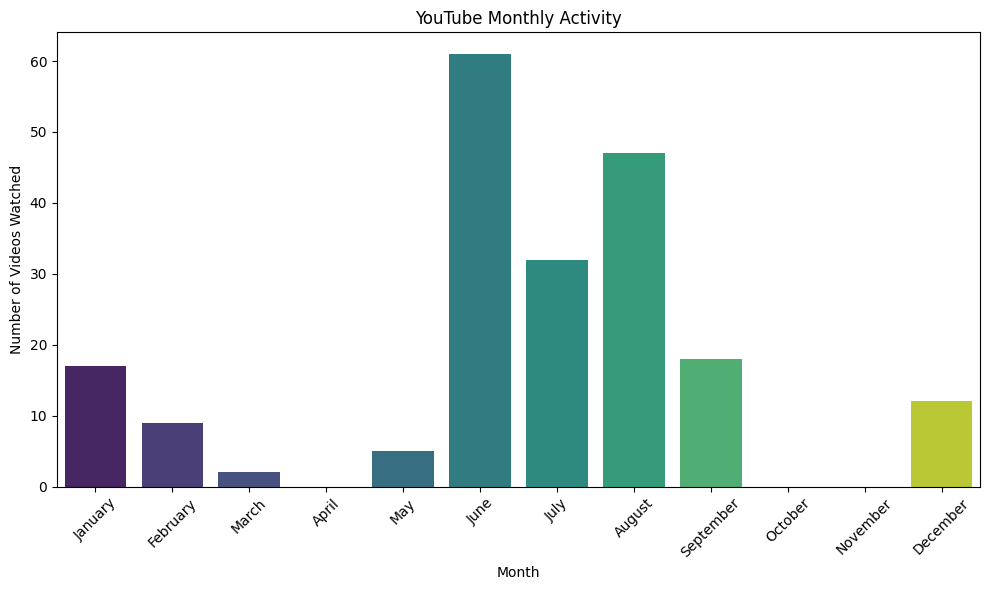

<ipython-input-2-0f86263c370f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_activity.index, y=weekly_activity.values, palette='coolwarm')


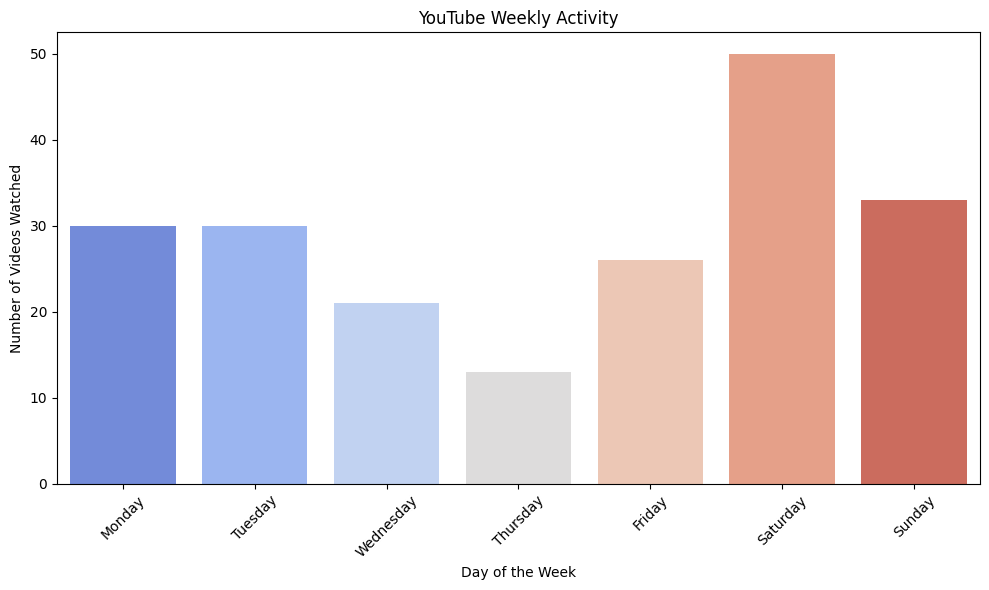

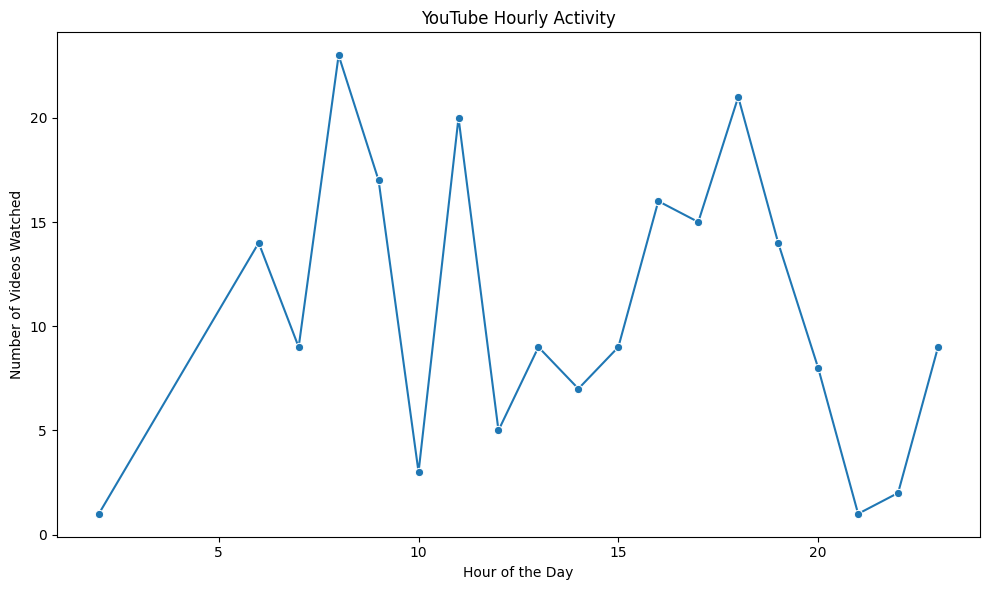

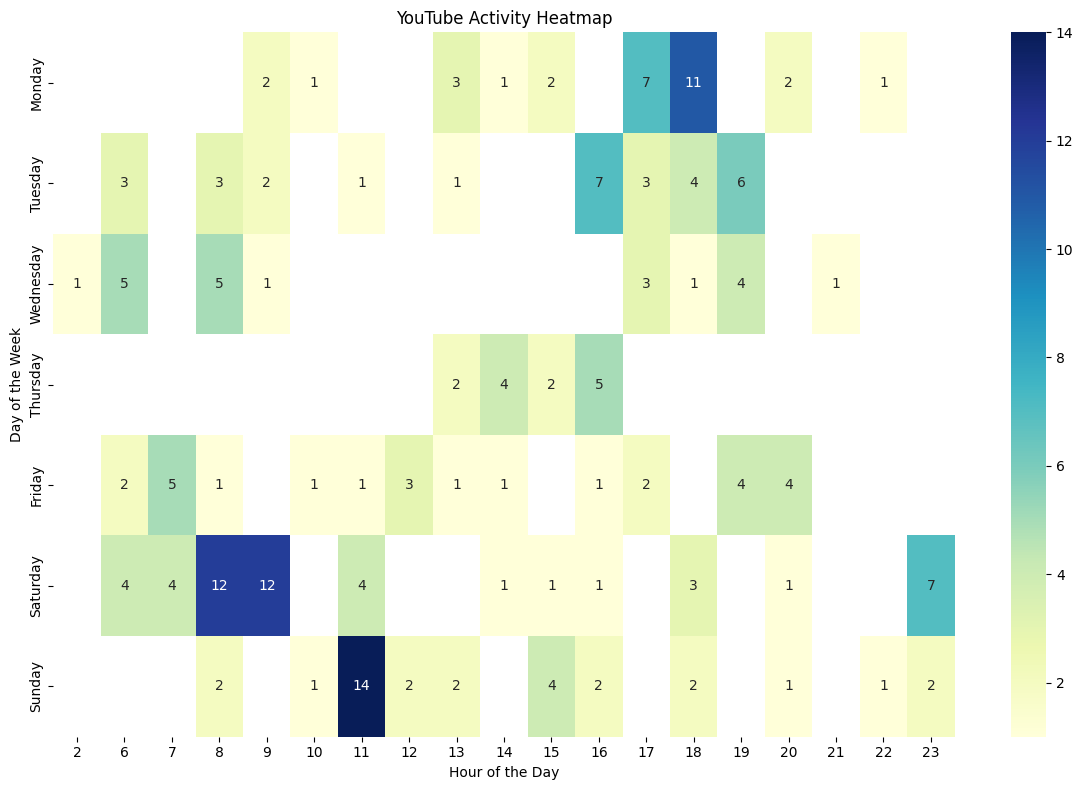

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the JSON file
file_path = '/content/watch-history.json'  # Update the file path if necessary
data = pd.read_json(file_path)

# Extract relevant columns and process data
df = pd.DataFrame(data)
df = df[['header', 'title', 'time']]  # Keep relevant columns
df['time'] = pd.to_datetime(df['time'])  # Convert time to datetime
df['date'] = df['time'].dt.date  # Extract date
df['hour'] = df['time'].dt.hour  # Extract hour
df['day_of_week'] = df['time'].dt.day_name()  # Day of the week
df['month'] = df['time'].dt.month_name()  # Month name

# Monthly activity
monthly_activity = df.groupby('month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Weekly activity
weekly_activity = df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly activity
hourly_activity = df.groupby('hour').size()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_activity.index, y=monthly_activity.values, palette='viridis')
plt.title('YouTube Monthly Activity')
plt.xlabel('Month')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_activity.index, y=weekly_activity.values, palette='coolwarm')
plt.title('YouTube Weekly Activity')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_activity.index, y=hourly_activity.values, marker='o')
plt.title('YouTube Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()

# Heatmap of activity
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack().reindex(index=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('YouTube Activity Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

# Save cleaned data for reference
df.to_csv('cleaned_watch_history.csv', index=False)


<ipython-input-3-1210a6880eb3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='pastel')


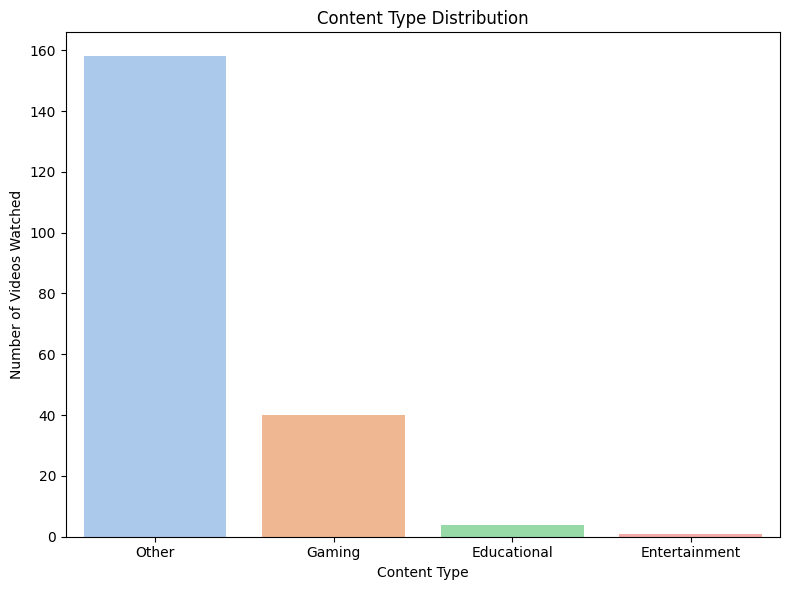

In [3]:
# Example of extracting keywords and categorizing content
def classify_content(title):
    if any(keyword in title.lower() for keyword in ['study', 'tutorial', 'lesson']):
        return 'Educational'
    elif any(keyword in title.lower() for keyword in ['game', 'nba', 'warzone']):
        return 'Gaming'
    elif any(keyword in title.lower() for keyword in ['music', 'funny', 'entertainment']):
        return 'Entertainment'
    else:
        return 'Other'

df['category'] = df['title'].apply(classify_content)

# Plot the distribution of categories
category_distribution = df['category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()


<ipython-input-5-7f13f04370e8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison.index, y=comparison.values, palette='coolwarm')


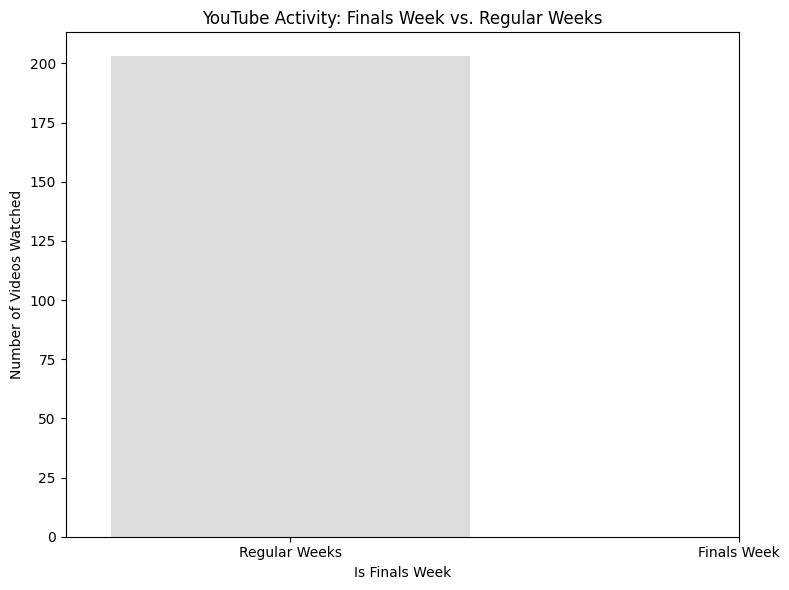

In [5]:
# Define finals week dates
finals_weeks = ['2023-01-10', '2023-01-01']  # Update with actual dates
df['is_finals_week'] = df['date'].apply(lambda x: x.isoformat() in finals_weeks)

# Compare finals week vs. regular weeks
comparison = df.groupby('is_finals_week').size()
plt.figure(figsize=(8, 6))
sns.barplot(x=comparison.index, y=comparison.values, palette='coolwarm')
plt.title('YouTube Activity: Finals Week vs. Regular Weeks')
plt.xlabel('Is Finals Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(ticks=[0, 1], labels=['Regular Weeks', 'Finals Week'])
plt.tight_layout()
plt.show()


<ipython-input-6-2d5e1bd70089>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_activity.index, y=seasonal_activity.values, palette='Blues')


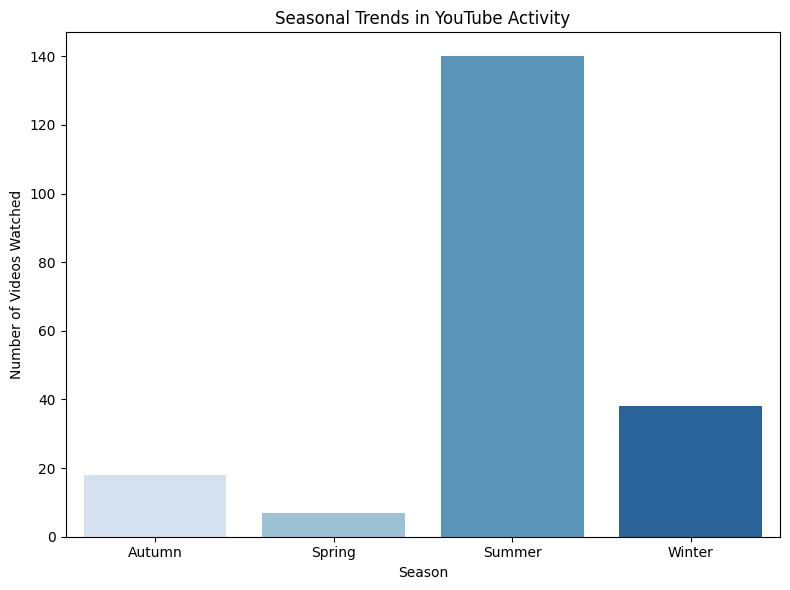

In [6]:
df['season'] = df['month'].apply(lambda x:
    'Winter' if x in ['December', 'January', 'February'] else
    'Spring' if x in ['March', 'April', 'May'] else
    'Summer' if x in ['June', 'July', 'August'] else
    'Autumn'
)

seasonal_activity = df.groupby('season').size()
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_activity.index, y=seasonal_activity.values, palette='Blues')
plt.title('Seasonal Trends in YouTube Activity')
plt.xlabel('Season')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()


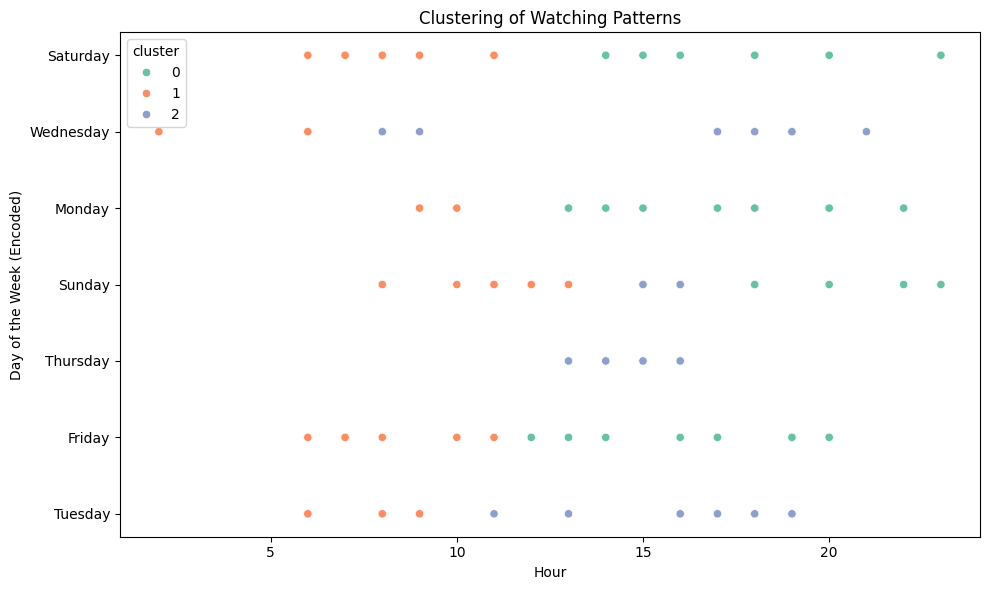

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Clustering based on hour and day of the week
features = df[['hour', 'day_of_week']].copy()
features['day_of_week'] = features['day_of_week'].astype('category').cat.codes
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hour', y='day_of_week', hue='cluster', palette='Set2')
plt.title('Clustering of Watching Patterns')
plt.xlabel('Hour')
plt.ylabel('Day of the Week (Encoded)')
plt.tight_layout()
plt.show()
